memo

- 欠損なし
- todo
- 片寄あり

## todo

### カテゴリかるを数値に変換
- gradeをいい感じにする。A->Fを順に並べる。ABCDEFで分ける。  
-[x] term, employmentをintにする
- 
### 特徴量エンジニアリング
- クレジットと信用スコア, 金利の組み合わせ
- 

In [1]:
import os,glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.manifold import TSNE
from utils import *
pd.set_option('display.max_columns', 50)

In [2]:
'''# first
df_train = read_csv(TRAIN)
df_test = read_csv(TEST)
df = train_test_merge(df_train, df_test, is_save = True)
df.head(10)'''

'# first\ndf_train = read_csv(TRAIN)\ndf_test = read_csv(TEST)\ndf = train_test_merge(df_train, df_test, is_save = True)\ndf.head(10)'

In [3]:
df = read_new_csv()
df_train, df_test = df_split(df)
df["employment_length"] = df["employment_length"].astype(int)
df.describe()
# yの平均は11.7

../feature/10301905.csv was read


,id,loan_amnt,term,interest_rate,grade,employment_length,credit_score,loan_status,amnt_per_year,grade_ordinal,interest,sum_amnt,grade_bin,amntpyear_bin,interest_0,interest_1,interest_2,interest_3,interest_4,0,1,2,3,4,purpose_major,credit_0,credit_1,credit_2,credit_3,credit_4,integral_score
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,17500.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.00000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000
mean,7249.500000,1584.467112,3.483600,14.422646,11.452160,5.677880,683.350996,0.214800,461.250995,11.452160,892.713947,2477.181059,1.668240,1.460600,0.176040,0.201600,0.282600,0.202360,0.137400,0.203560,0.416880,0.16032,0.153880,0.065360,0.00960,0.450280,0.25064,0.063000,0.193920,0.042160,683.350996
std,4951.950537,828.123592,0.856365,5.062192,5.677066,3.745915,30.267766,0.410695,240.102026,5.677066,812.210690,1528.159152,1.111173,1.164277,0.380862,0.401203,0.450273,0.401767,0.344276,0.402653,0.493053,0.36691,0.360841,0.247165,0.09751,0.497532,0.43339,0.242968,0.395375,0.200958,15.050497
min,0.000000,400.972831,3.000000,5.315124,1.000000,0.000000,641.930293,0.000000,96.479298,1.000000,87.008137,531.411676,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,665.767940
25%,3124.750000,1068.913915,3.000000,10.888940,7.000000,2.000000,659.027469,0.000000,324.527275,7.000000,365.891234,1450.514755,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,673.233876
50%,6249.500000,1190.044345,3.000000,13.809834,12.000000,6.000000,678.107588,0.000000,382.852160,12.000000,555.391853,1838.711191,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,678.493519
75%,11249.250000,2250.337686,3.000000,18.049357,16.000000,10.000000,699.620272,0.000000,534.578365,16.000000,1143.765534,3273.957573,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.00000,1.000000,1.00000,0.000000,0.000000,0.000000,687.408642
max,17499.000000,3815.251133,5.000000,27.970416,27.000000,10.000000,802.764452,1.000000,1245.650568,27.000000,4770.917464,8484.185515,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,734.517138


In [72]:
print("y is yes")
df_train[df_train[TARGET] == 1].describe()

y is yes


,id,loan_amnt,term,interest_rate,grade,employment_length,credit_score,amnt_per_year,grade_ordinal,interest,sum_amnt,grade_bin,amntpyear_bin,interest_0,interest_1,interest_2,interest_3,interest_4,0,1,2,3,4,purpose_major,credit_0,credit_1,credit_2,credit_3,credit_4,loan_0,loan_1,loan_2,loan_3,loan_4
count,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.00000,3759.000000
mean,8796.419792,1608.333723,3.644852,16.952748,13.568768,5.915403,672.867864,448.529031,13.568768,1112.527587,2720.861310,2.075552,1.434424,0.044693,0.175845,0.254323,0.263900,0.261240,0.195265,0.418462,0.197659,0.133812,0.054802,0.038308,0.605480,0.243948,0.054004,0.077946,0.018622,0.133812,0.379622,0.191540,0.18489,0.110136
std,5030.761676,812.356532,0.934935,5.005801,5.386992,3.815709,22.441539,225.452816,5.386992,923.038380,1639.949430,1.040498,1.110402,0.206656,0.380739,0.435538,0.440804,0.439369,0.396457,0.493372,0.398286,0.340496,0.227623,0.191964,0.488812,0.429519,0.226055,0.268123,0.135204,0.340496,0.485357,0.393566,0.38826,0.313100
min,2.000000,425.222923,3.000000,6.083635,1.000000,0.000000,649.316663,100.995041,1.000000,114.936956,628.174673,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,4464.000000,1085.465111,3.000000,13.323700,9.000000,2.000000,658.130315,319.414209,9.000000,450.507366,1557.167011,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,8838.000000,1224.528148,3.000000,17.376077,14.000000,6.000000,662.038432,382.917189,14.000000,759.584991,2134.230442,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,13120.500000,2246.028895,5.000000,21.447228,18.000000,10.000000,680.102291,517.251346,18.000000,1535.185794,3534.983305,3.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000
max,17496.000000,3815.251133,5.000000,27.970416,27.000000,10.000000,795.849210,1228.641186,27.000000,4498.118134,8159.925664,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [4]:
print("y is no")
df_train[df_train[TARGET] == 0].describe()

y is no


,id,loan_amnt,term,interest_rate,grade,employment_length,credit_score,loan_status,amnt_per_year,grade_ordinal,interest,sum_amnt,grade_bin
count,13741.000000,13741.000000,13741.00000,13741.000000,13741.000000,13741.000000,13741.000000,13741.0,13741.000000,13741.000000,13741.000000,13741.000000,13741.000000
mean,8736.664580,1576.062025,3.44087,13.774980,10.925770,5.628411,686.034336,0.0,464.431824,10.925770,834.333918,2410.395943,1.567135
std,5057.849211,834.901465,0.82911,4.875512,5.625596,3.727105,31.368913,0.0,245.389131,5.625596,771.944448,1494.545114,1.106594
min,0.000000,400.972831,3.00000,5.315124,1.000000,0.000000,649.637705,0.0,96.479298,1.000000,87.008137,538.204680,0.000000
25%,4353.000000,1062.543596,3.00000,10.589622,6.000000,2.000000,659.414121,0.0,323.896859,6.000000,340.613760,1415.369625,1.000000
50%,8731.000000,1182.741337,3.00000,13.500775,11.000000,6.000000,679.164679,0.0,382.822280,11.000000,519.879596,1754.422173,2.000000
75%,13126.000000,2250.337593,3.00000,17.525414,15.000000,10.000000,710.534396,0.0,541.723001,15.000000,1045.331786,3197.893980,2.000000
max,17499.000000,3743.488205,5.00000,27.377700,27.000000,10.000000,802.764452,0.0,1245.650568,27.000000,4599.705664,8235.651020,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 25000 non-null  int64  
 1   loan_amnt          25000 non-null  float64
 2   term               25000 non-null  int64  
 3   interest_rate      25000 non-null  float64
 4   grade              25000 non-null  int64  
 5   employment_length  25000 non-null  int64  
 6   purpose            25000 non-null  object 
 7   grade.1            25000 non-null  object 
 8   credit_score       25000 non-null  float64
 9   application_type   25000 non-null  object 
 10  loan_status        17500 non-null  float64
 11  is_train           25000 non-null  bool   
 12  amnt_per_year      25000 non-null  float64
 13  grade_ordinal      25000 non-null  int64  
 14  interest           25000 non-null  float64
 15  sum_amnt           25000 non-null  float64
 16  grade_bin          250

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7500 non-null   int64  
 1   loan_amnt          7500 non-null   float64
 2   term               7500 non-null   int64  
 3   interest_rate      7500 non-null   float64
 4   grade              7500 non-null   int64  
 5   employment_length  7500 non-null   int64  
 6   purpose            7500 non-null   object 
 7   grade.1            7500 non-null   object 
 8   credit_score       7500 non-null   float64
 9   application_type   7500 non-null   object 
 10  amnt_per_year      7500 non-null   float64
 11  grade_ordinal      7500 non-null   int64  
 12  interest           7500 non-null   float64
 13  sum_amnt           7500 non-null   float64
 14  grade_bin          7500 non-null   int64  
dtypes: float64(6), int64(6), object(3)
memory usage: 937.5+ KB


In [7]:
df_train.describe()

,id,loan_amnt,term,interest_rate,grade,employment_length,credit_score,loan_status,amnt_per_year,grade_ordinal,interest,sum_amnt,grade_bin
count,17500.000000,17500.000000,17500.000000,17500.000000,17500.000000,17500.000000,17500.000000,17500.000000,17500.000000,17500.000000,17500.000000,17500.000000,17500.000000
mean,8749.500000,1582.993986,3.484686,14.457565,11.493486,5.690057,683.206178,0.214800,461.015904,11.493486,894.089918,2477.083904,1.676343
std,5051.959191,830.193264,0.857026,5.074348,5.679741,3.748058,30.166656,0.410695,241.327923,5.679741,814.811034,1532.212171,1.112476
min,0.000000,400.972831,3.000000,5.315124,1.000000,0.000000,649.316663,0.000000,96.479298,1.000000,87.008137,538.204680,0.000000
25%,4374.750000,1067.690423,3.000000,10.906715,7.000000,2.000000,659.023544,0.000000,322.501103,7.000000,365.359599,1448.767515,1.000000
50%,8749.500000,1189.121646,3.000000,13.813722,12.000000,6.000000,678.063411,0.000000,382.852160,12.000000,560.938065,1838.885111,2.000000
75%,13124.250000,2249.821992,3.000000,18.057546,16.000000,10.000000,699.448349,0.000000,535.199622,16.000000,1142.294250,3266.860350,3.000000
max,17499.000000,3815.251133,5.000000,27.970416,27.000000,10.000000,802.764452,1.000000,1245.650568,27.000000,4599.705664,8235.651020,5.000000


# メモ
- ageとjobは相関がありそう＝＞除くべき？
http://www.housecat442.com/?p=494
- housing, age, job, loanは関わってそう
- ageが結構寄与しているが、他と相関があるからな気がする
- 各種unknown埋めをしたい(job education contact poutcome)

# EDA

## 基本統計量の確認
平均、最大、最小、分散とかをみてみる

In [8]:
df_train.head(10)

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,grade.1,credit_score,application_type,loan_status,amnt_per_year,grade_ordinal,interest,sum_amnt,grade_bin,amntpyear_bin,interest_grade,interest_0,interest_1,interest_2,interest_3,interest_4,0,1,2,3,4,purpose_major,credit_grade,credit_0,credit_1,credit_2,credit_3,credit_4,loan_grade,integral_score
7500,0,1256.710800,5,10.603779,6,5,debt_consolidation,B1,680.431766,Individual,0.0,251.342160,6,666.294160,1923.004960,1,0,interest_1,0,1,0,0,0,1,0,0,0,0,0,credit_1,0,1,0,0,0,loan_1,687.345700
7501,1,569.559607,3,17.305565,15,3,house,C5,713.063128,Individual,0.0,189.853202,15,295.696531,865.256138,2,0,interest_3,0,0,0,1,0,1,0,0,0,0,0,credit_3,0,0,0,1,0,loan_0,679.522025
7502,2,1118.838050,3,14.041342,13,2,debt_consolidation,C3,696.137378,Individual,1.0,372.946017,13,471.299617,1590.137667,2,1,interest_2,0,0,1,0,0,0,1,0,0,0,0,credit_2,0,0,1,0,0,loan_1,687.180090
7503,3,610.721728,3,13.048348,12,5,medical,C2,656.373090,Individual,0.0,203.573909,12,239.067289,849.789017,2,0,interest_2,0,0,1,0,0,1,0,0,0,0,0,credit_0,1,0,0,0,0,loan_0,671.667161
7504,4,1180.026840,3,11.384862,8,10,debt_consolidation,B3,657.211233,Individual,0.0,393.342280,8,403.033299,1583.060139,1,1,interest_1,0,1,0,0,0,0,1,0,0,0,0,credit_0,1,0,0,0,0,loan_1,687.408642
7505,5,1172.219819,3,11.397183,8,5,debt_consolidation,B3,712.157342,Joint App,0.0,390.739940,8,400.800115,1573.019934,1,1,interest_1,0,1,0,0,0,0,1,0,0,0,0,credit_3,0,0,0,1,0,loan_1,687.408642
7506,6,2433.646304,3,10.101810,8,10,debt_consolidation,B3,713.201971,Individual,0.0,811.215435,8,737.527009,3171.173313,1,3,interest_1,0,1,0,0,0,0,0,0,1,0,0,credit_3,0,0,0,1,0,loan_3,687.408642
7507,7,1021.960300,5,18.093028,19,4,debt_consolidation,D4,658.299475,Individual,0.0,204.392060,19,924.517827,1946.478127,3,0,interest_3,0,0,0,1,0,1,0,0,0,0,0,credit_0,1,0,0,0,0,loan_1,668.995395
7508,8,1200.741420,5,11.090507,6,7,debt_consolidation,B1,771.964087,Individual,0.0,240.148284,6,665.841526,1866.582946,1,0,interest_1,0,1,0,0,0,1,0,0,0,0,0,credit_4,0,0,0,0,1,loan_1,687.345700
7509,9,1731.132899,5,17.732408,18,4,debt_consolidation,D3,657.732889,Individual,1.0,346.226580,18,1534.857742,3265.990641,3,1,interest_3,0,0,0,1,0,0,1,0,0,0,0,credit_0,1,0,0,0,0,loan_2,673.390667


In [10]:
df_test.head(10)

,Unnamed: 0,ID,age,job,marital,education,default,balance,housing,loan,...,campaign,pdays,previous,poutcome,y,duration_log,duration_sqrt,balance_log,balance_sqrt,balance_log_cut
40211,0,4,47,8,1,3,0,9526,1,0,...,1,-1,0,1,NaN,4.532599,9.643651,9.161780,97.601230,1.161780
40212,1,19,60,5,1,4,0,8080,1,0,...,1,-1,0,1,NaN,5.393628,14.832397,8.997147,89.888820,0.997147
40213,2,25,40,5,1,4,0,8020,1,1,...,1,-1,0,1,NaN,5.204007,13.490738,8.989694,89.554453,0.989694
40214,3,29,46,1,2,2,0,7774,1,0,...,2,-1,0,1,NaN,5.545177,16.000000,8.958540,88.170290,0.958540
40215,4,35,51,1,1,1,0,18655,1,0,...,1,-1,0,1,NaN,5.820083,18.357560,9.833869,136.583308,1.833869
40216,5,51,54,8,1,2,0,9311,1,0,...,1,-1,0,1,NaN,5.587249,16.340135,9.138952,96.493523,1.138952
40217,6,75,43,2,1,2,0,9957,1,0,...,1,-1,0,1,NaN,5.204007,13.490738,9.206031,99.784768,1.206031
40218,7,85,46,9,1,1,0,8157,1,1,...,1,-1,0,1,NaN,5.509388,15.716234,9.006632,90.316112,1.006632
40219,8,90,57,5,1,2,0,8506,1,0,...,2,-1,0,1,NaN,5.198497,13.453624,9.048527,92.227978,1.048527
40220,9,92,30,2,1,2,0,8172,1,1,...,2,-1,0,1,NaN,5.365976,14.628739,9.008469,90.399115,1.008469


<AxesSubplot:>

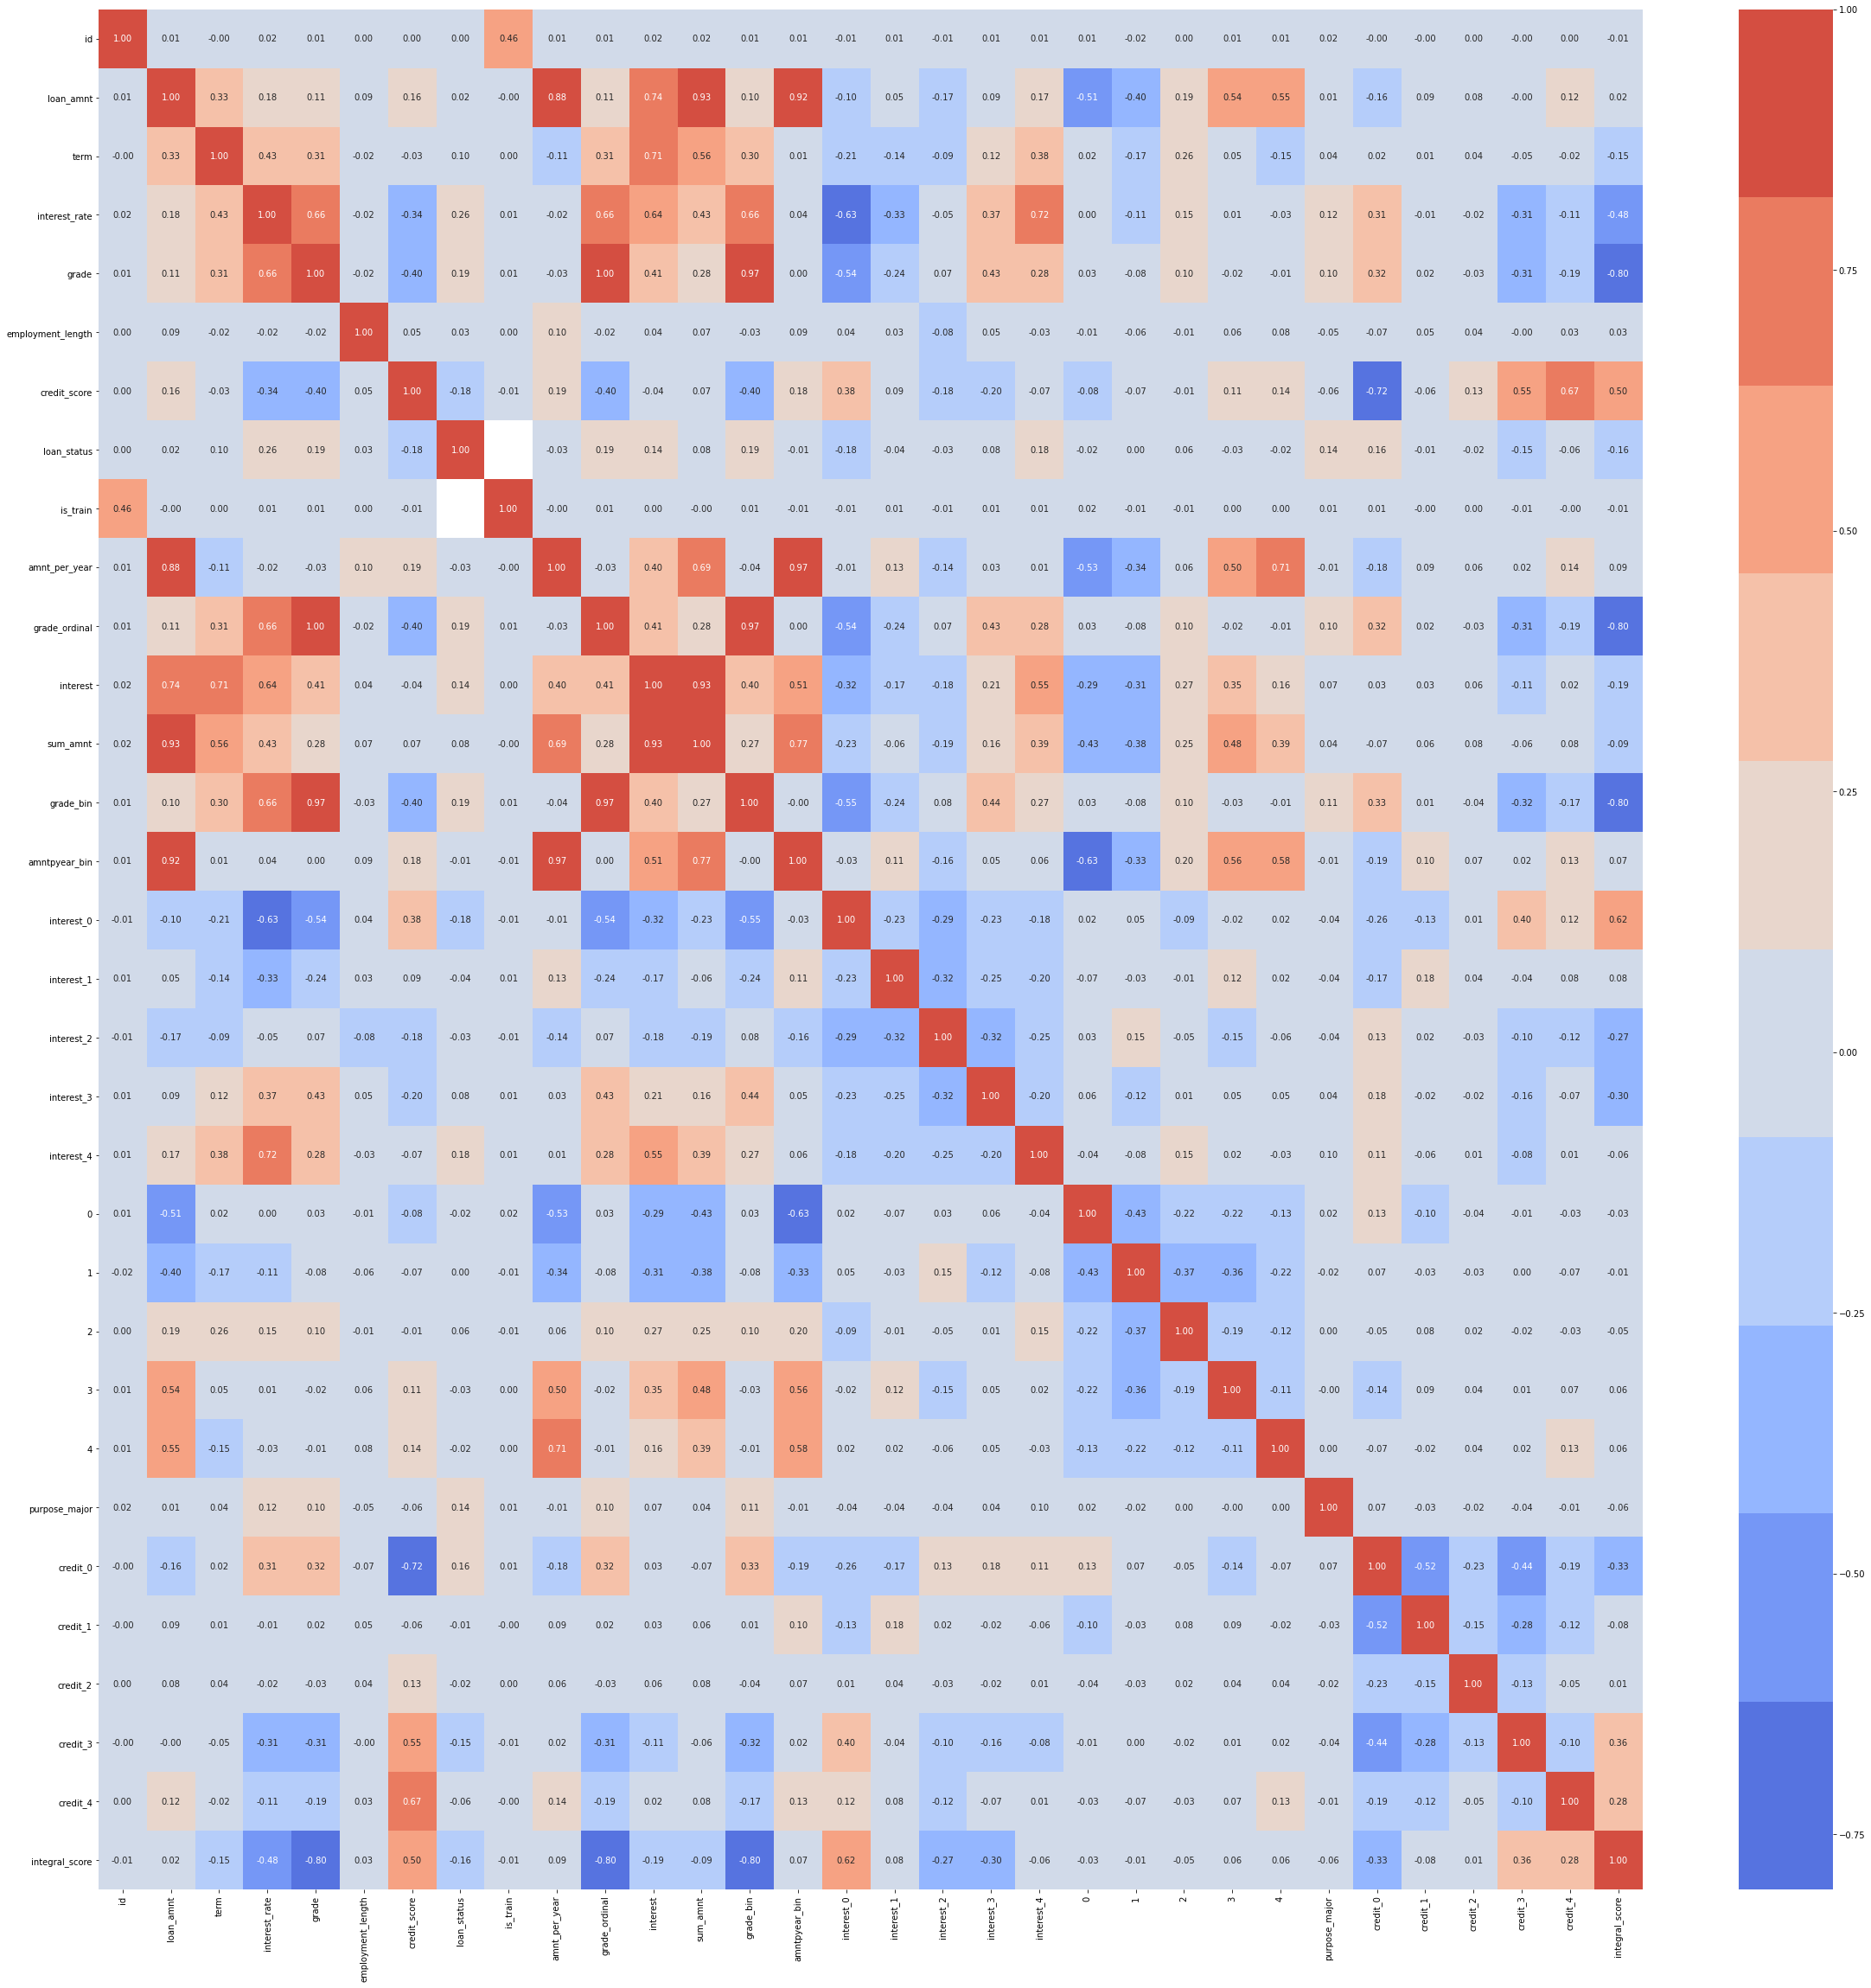

In [80]:
plt.figure(figsize=(40, 40))
sns.heatmap(df.corr(), cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f')


# numerical　dataのチェック


## loan

明らかに多峰＝＞それぞれが何か知りたい  
５つに分けれそう。
- ５つのカテゴリ
- 

<Figure size 2880x2880 with 0 Axes>

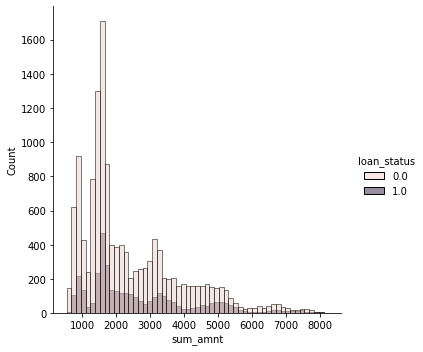

In [22]:
plt.figure(figsize=(40, 40))
sns.displot(x = "sum_amnt", data = df, hue = TARGET)

In [5]:
'debt_consolidation', 'house', 'medical', 'credit_card', 'other',
       'small_business', 'major_purchase', 'home_improvement', 'car'

IndentationError: unexpected indent (<ipython-input-5-cf85cf1d8c7e>, line 2)

<Figure size 216000x216000 with 0 Axes>

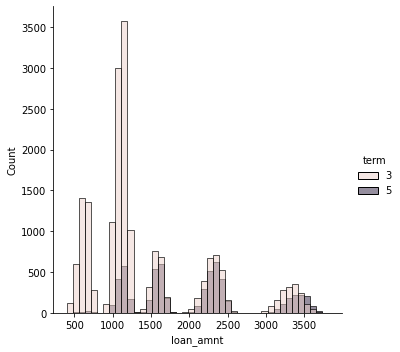

In [6]:
plt.figure(figsize=(3000, 3000))
sns.displot(x = "loan_amnt", data = df, hue = "term")

<Figure size 216000x216000 with 0 Axes>

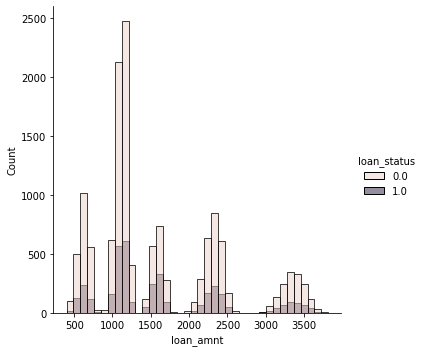

In [25]:
plt.figure(figsize=(3000, 3000))
sns.displot(x = "loan_amnt", data = df, hue = TARGET)

<AxesSubplot:xlabel='loan_grade', ylabel='loan_status'>

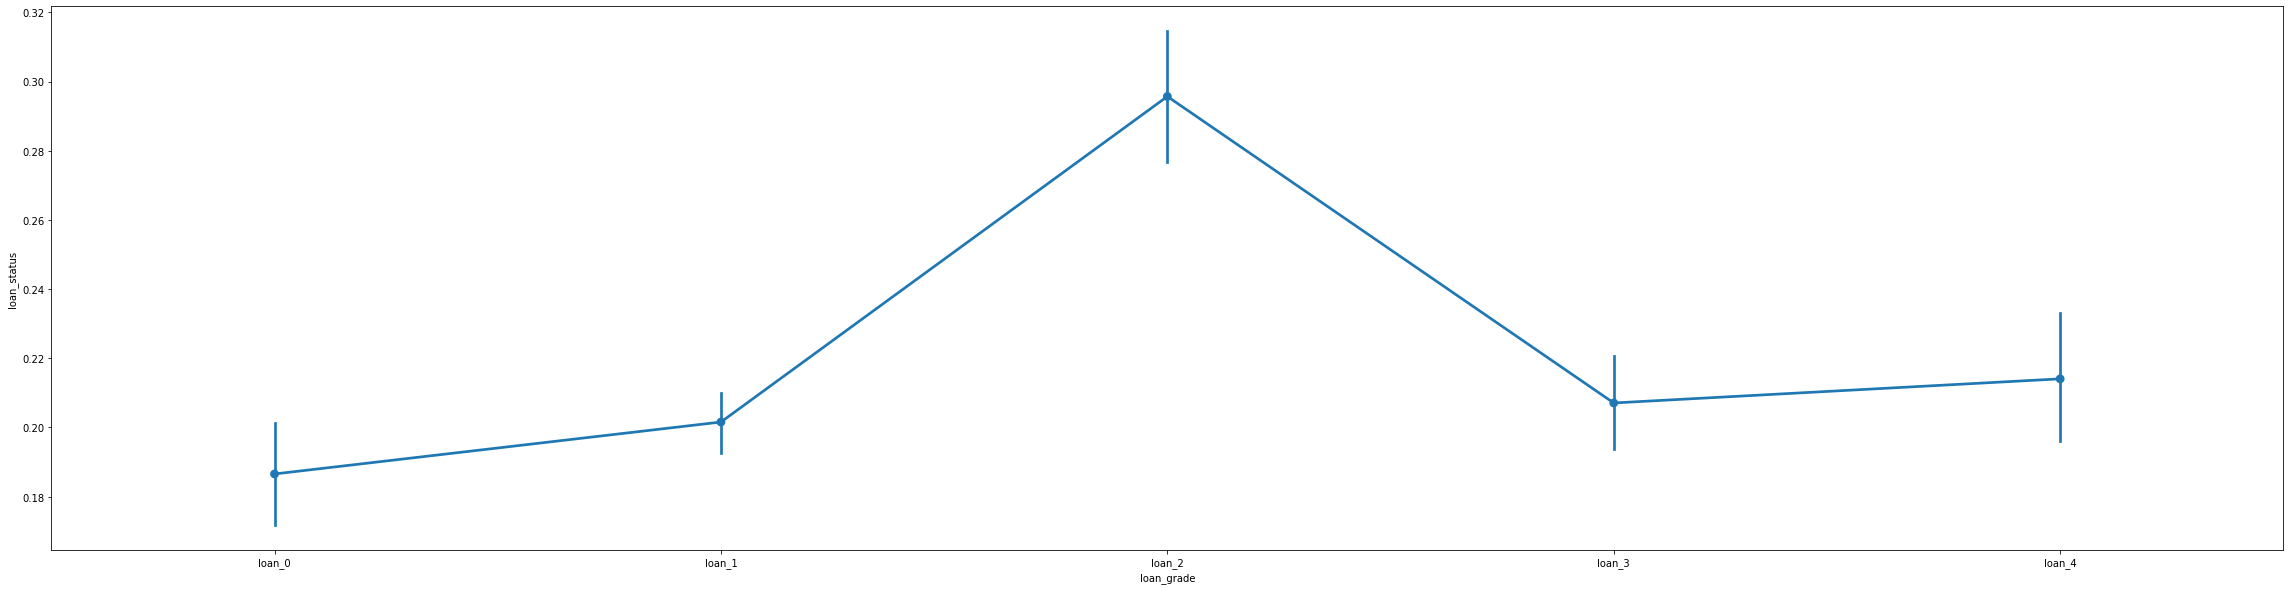

In [24]:
plt.figure(figsize=(40, 10))
df_train_loan_grade = df_train.sort_values('loan_grade')
sns.pointplot(x = "loan_grade", y =TARGET, data = df_train_loan_grade)

amntperyear = amnt/year  
一年で返す借金

<Figure size 2880x720 with 0 Axes>

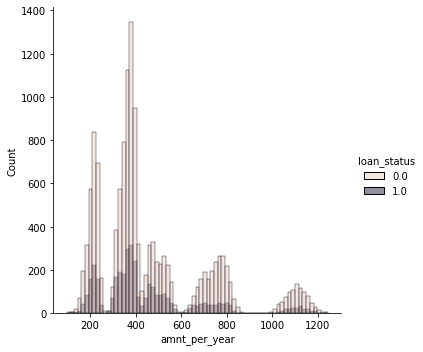

In [9]:
#%matplotlib qt
plt.figure(figsize=(40, 10))
sns.displot(x = "amnt_per_year", data = df)

<AxesSubplot:xlabel='amntpyear_bin', ylabel='loan_status'>

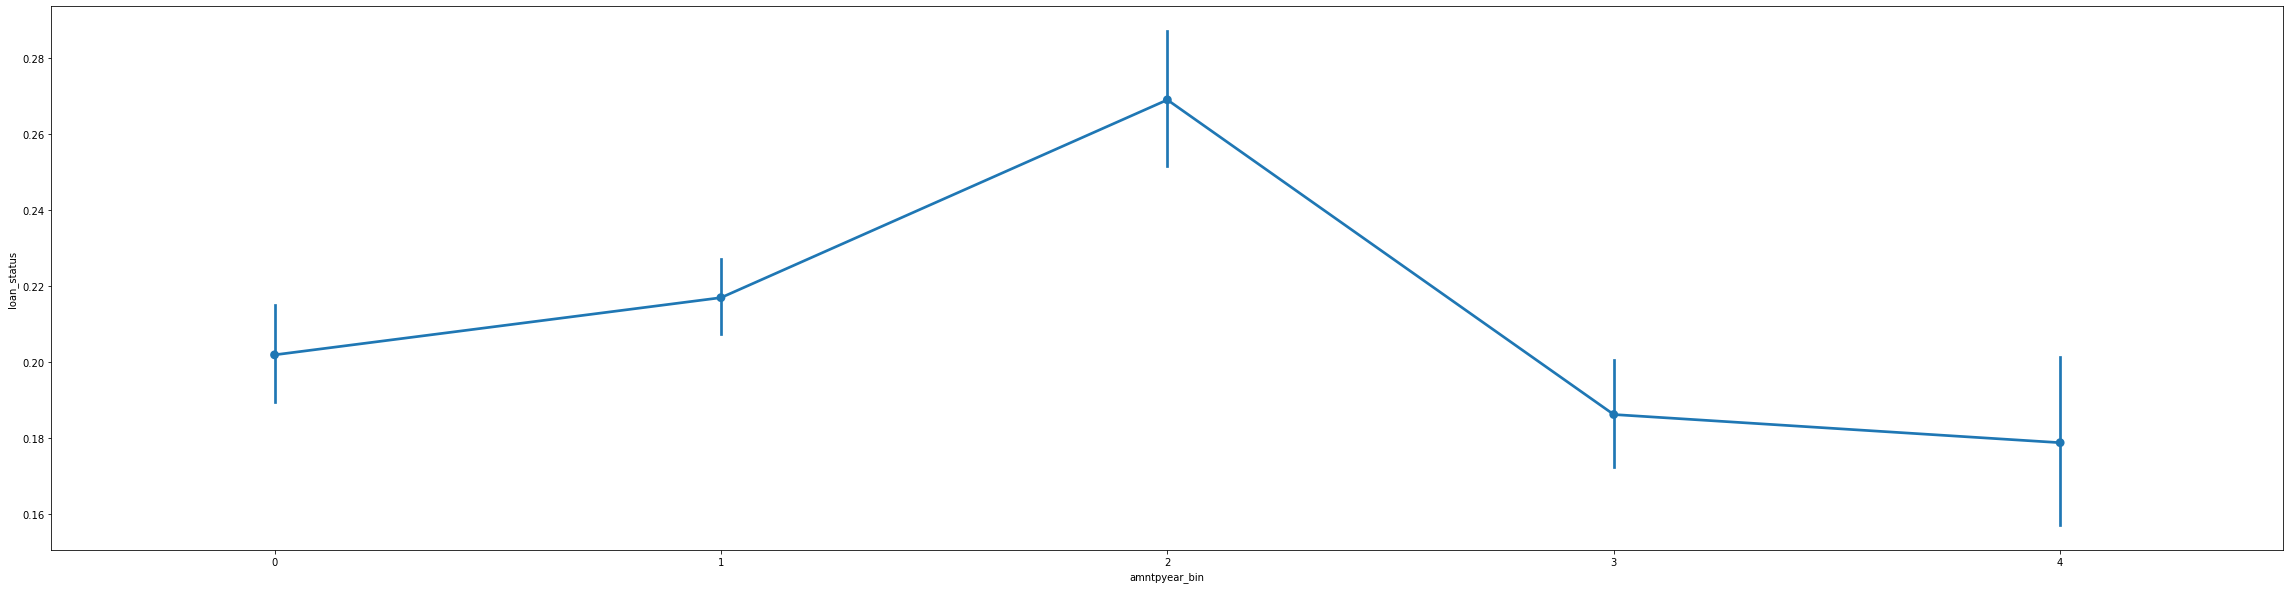

In [6]:
plt.figure(figsize=(40, 10))
df_train_grade = df_train_grade.sort_values('grade_bin')
sns.pointplot(x = "amntpyear_bin", y =TARGET, data = df_train)

<Figure size 2880x720 with 0 Axes>

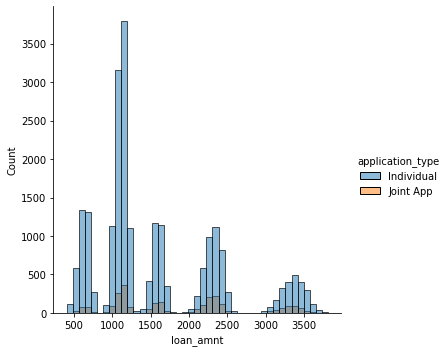

In [20]:
plt.figure(figsize=(40, 10))
sns.displot(x = "loan_amnt", data = df, hue = "application_type")

## interest_rate
金利

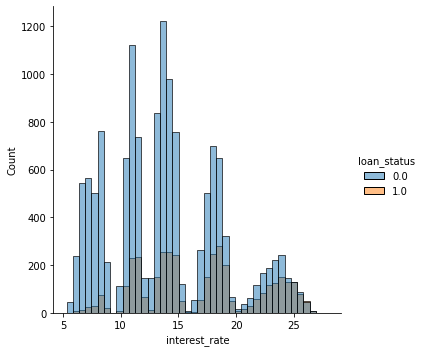

In [14]:
sns.displot(x ="interest_rate",data = df_train, hue = TARGET)

<AxesSubplot:xlabel='interest_grade', ylabel='loan_status'>

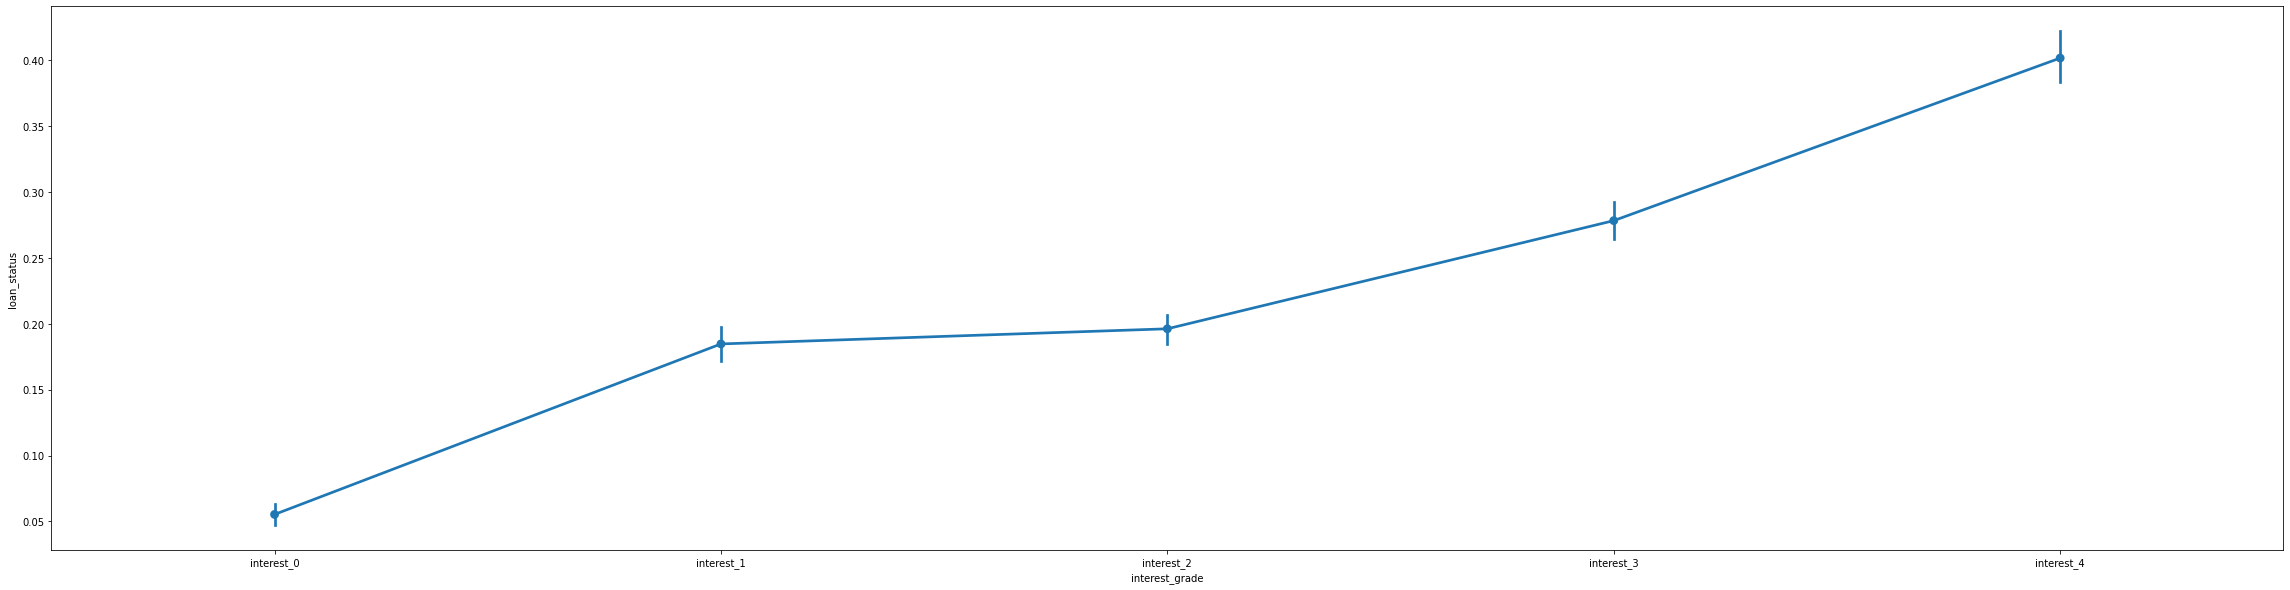

In [16]:
plt.figure(figsize=(40, 10))
df_train_interest_bin = df_train.sort_values('interest_grade')
sns.pointplot(x = "interest_grade", y =TARGET, data = df_train_interest_bin)

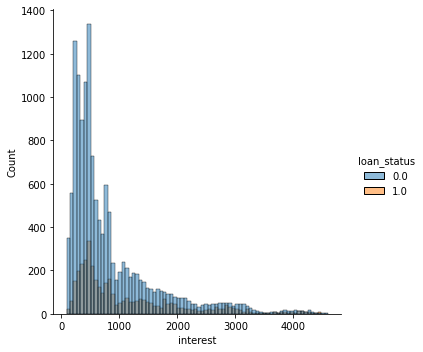

In [8]:
sns.displot(x ="interest",data = df_train, hue = TARGET)

## employment length

<AxesSubplot:xlabel='employment_length', ylabel='loan_status'>

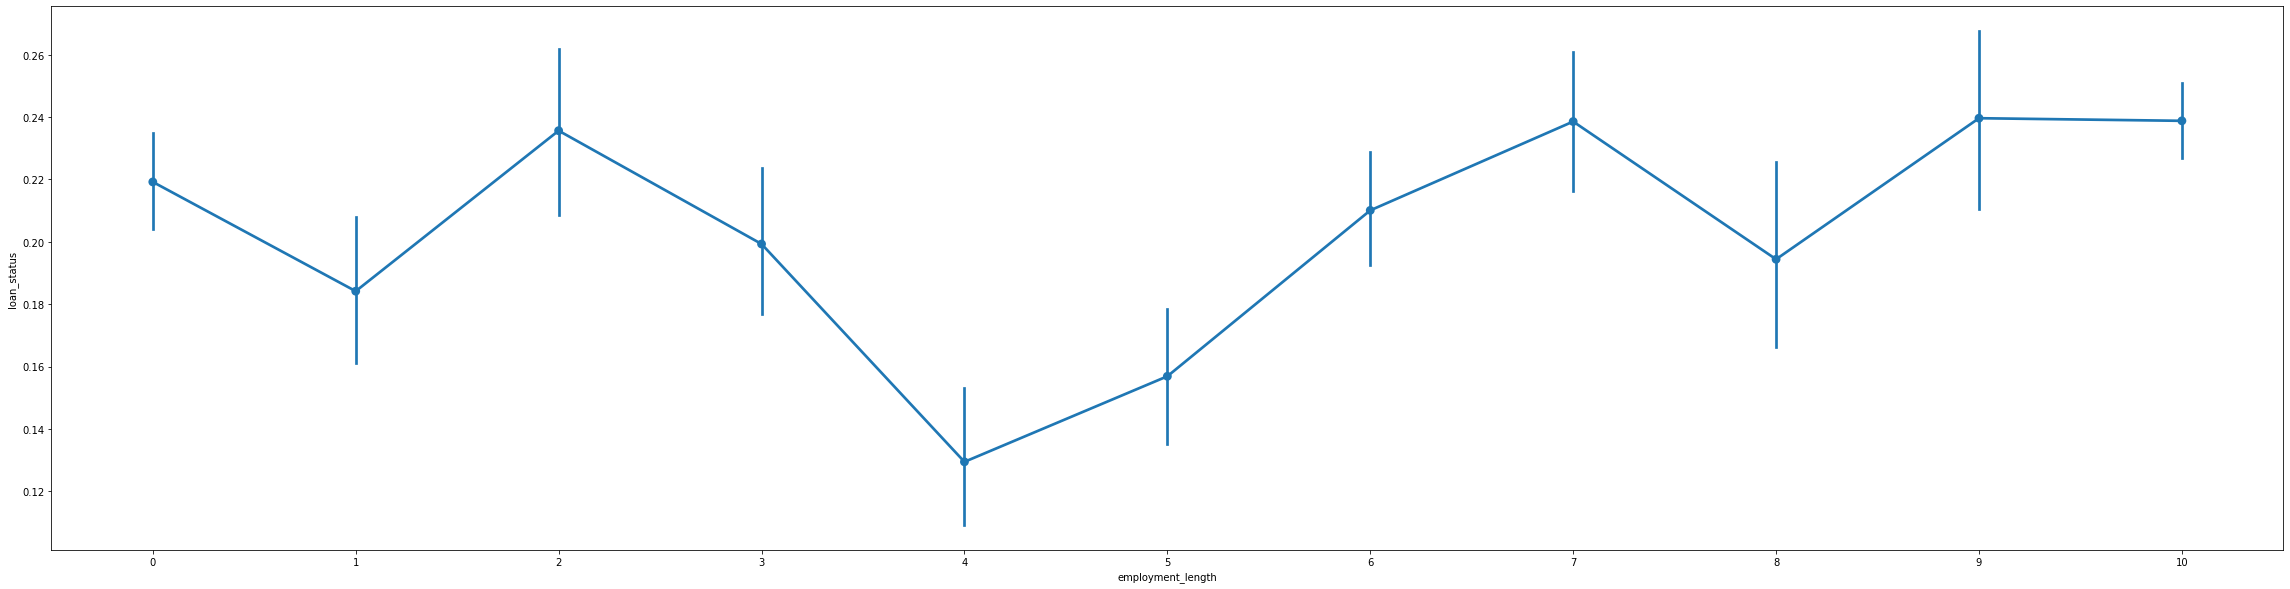

In [21]:
plt.figure(figsize=(40, 10))
sns.pointplot(x = "employment_length", y =TARGET, data = df_train)

## credit_score
credit が大きいほどgradeがAに近い

In [39]:

df

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,grade.1,credit_score,application_type,loan_status,is_train,amnt_per_year,grade_ordinal,interest,sum_amnt,grade_bin
0,0,1742.228656,5,7.992879,4,8,debt_consolidation,A4,677.196371,Individual,NaN,False,348.445731,4,696.271104,2438.499760,0
1,1,630.300979,3,13.604302,18,6,debt_consolidation,D3,655.143270,Individual,NaN,False,210.100326,18,257.244152,887.545131,3
2,2,1606.895116,5,24.674460,15,10,credit_card,C5,680.532978,Individual,NaN,False,321.379023,15,1982.463456,3589.358572,2
3,3,1120.716185,3,13.407068,11,1,credit_card,C1,659.544561,Individual,NaN,False,373.572062,11,450.765548,1571.481733,2
4,4,688.615551,3,18.118501,12,10,other,C2,654.822203,Individual,NaN,False,229.538517,12,374.300453,1062.916003,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,17495,2495.568495,3,11.806962,8,10,credit_card,B3,679.886560,Individual,0.0,True,831.856165,8,883.952483,3379.520978,1
24996,17496,636.151639,3,11.449207,7,0,car,B2,660.318169,Individual,1.0,True,212.050546,7,218.502956,854.654595,1
24997,17497,2398.851088,5,24.501209,25,8,debt_consolidation,E5,657.758005,Individual,0.0,True,479.770218,25,2938.737610,5337.588698,4
24998,17498,1010.424260,3,8.196667,5,0,medical,A5,707.729934,Individual,0.0,True,336.808087,5,248.463343,1258.887603,0


<Figure size 2880x720 with 0 Axes>

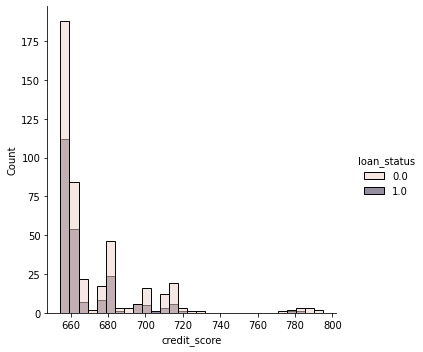

In [76]:
plt.figure(figsize=(40, 10))
sns.displot(x = 'credit_score', data = df[df["grade_bin"] == 4], hue = TARGET)

In [71]:
df[df["grade_bin"] == "1"]

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,grade.1,credit_score,application_type,loan_status,is_train,amnt_per_year,grade_ordinal,interest,sum_amnt,grade_bin,amntpyear_bin,interest_grade,interest_0,interest_1,interest_2,interest_3,interest_4,0,1,2,3,4,purpose_major,credit_grade,credit_0,credit_1,credit_2,credit_3,credit_4,loan_grade,loan_0,loan_1,loan_2,loan_3,loan_4


<AxesSubplot:xlabel='credit_grade', ylabel='loan_status'>

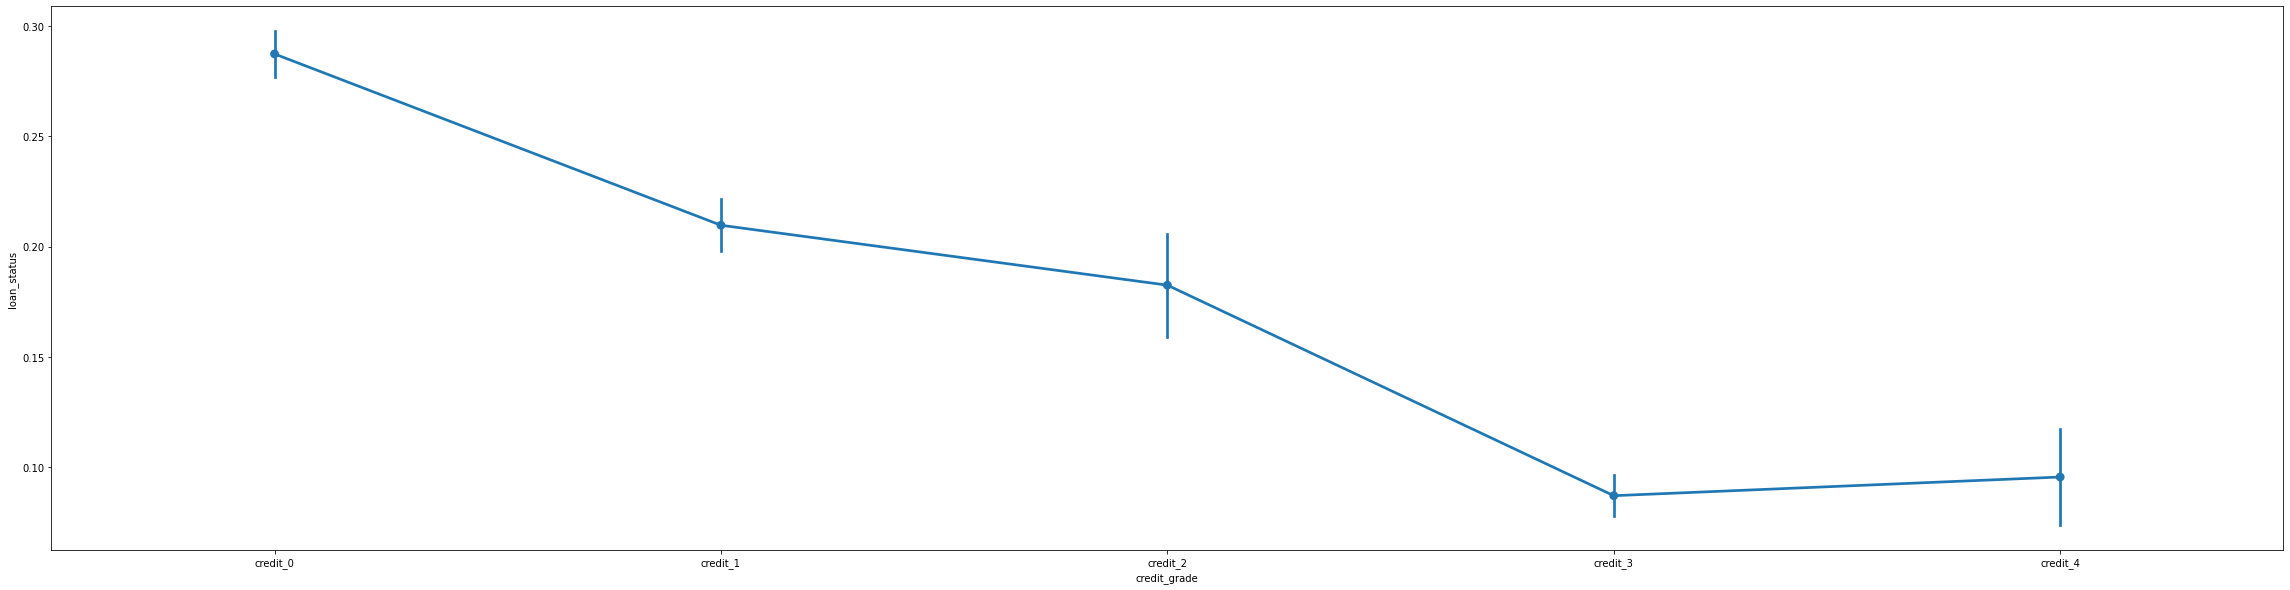

In [17]:
plt.figure(figsize=(40, 10))
df_train_credit_bin = df_train.sort_values('credit_grade')
sns.pointplot(x = "credit_grade", y =TARGET, data = df_train_credit_bin)

# categorical dataのチェック

## grade

グレード
todo: 何を表している？
- Aが信用高いEが低い　　
- A3, C3は期間が長い, A3は返していない
- D以降はだいぶ期限長め
Fは投資のような要素　  
https://www.okasan.co.jp/service/bond/features/grade.html

In [10]:
df['grade'].unique()

array(['B1', 'C5', 'C3', 'C2', 'B3', 'D4', 'D3', 'C1', 'A1', 'B2', 'A3',
       'B4', 'A5', 'A2', 'B5', 'D1', 'C4', 'D5', 'F5', 'E5', 'A4', 'E4',
       'D2', 'E2', 'E1', 'E3', 'F3'], dtype=object)

<AxesSubplot:xlabel='grade.1', ylabel='count'>

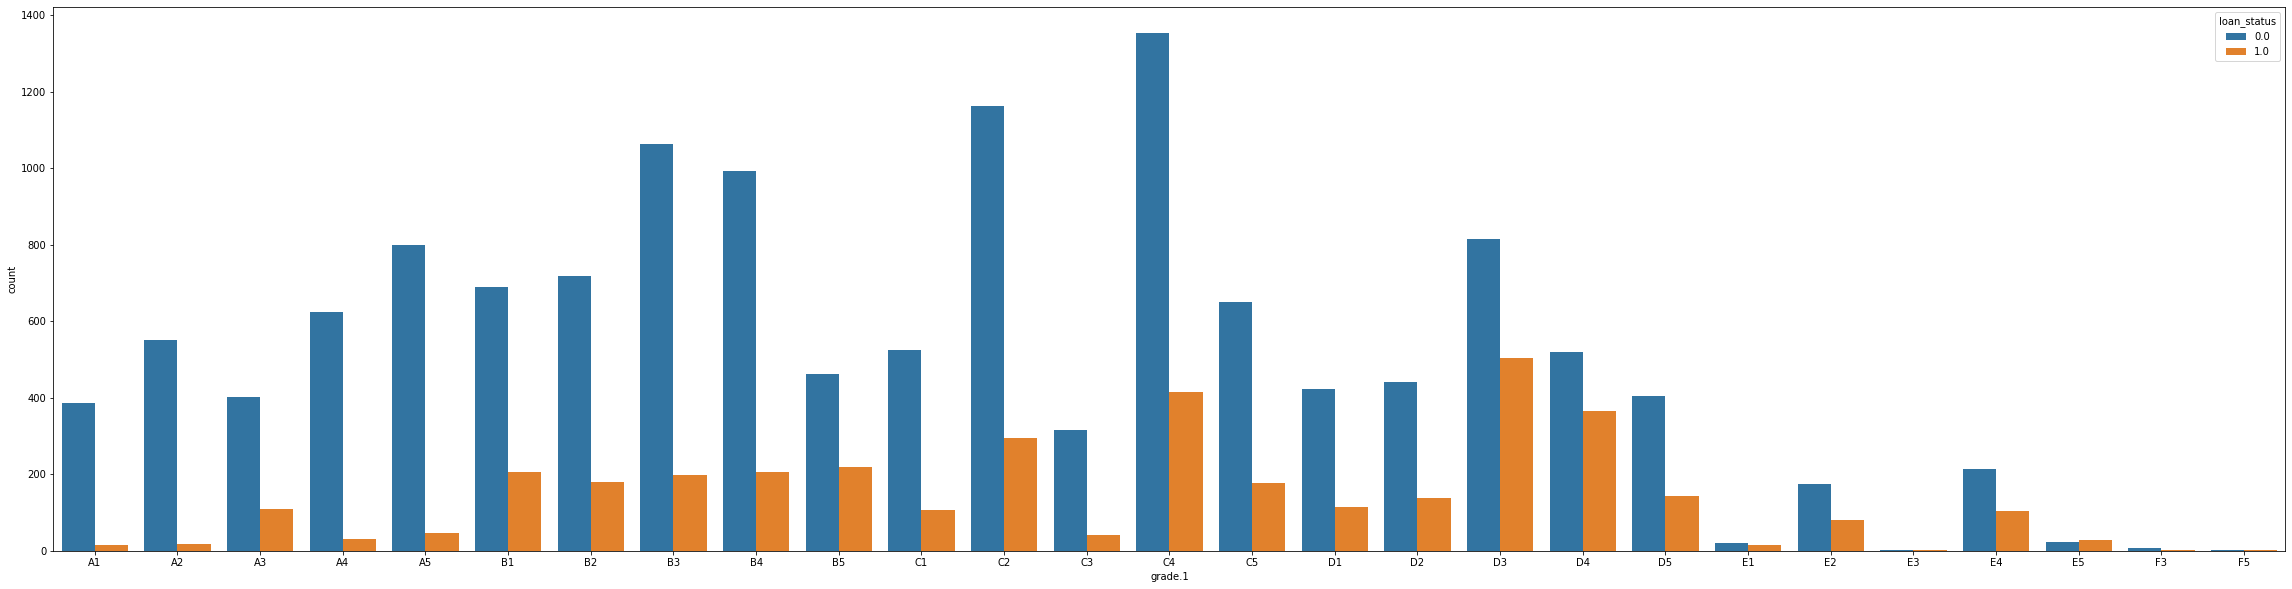

In [31]:
plt.figure(figsize=(40, 10))
df_train_grade = df_train.sort_values('grade')
sns.countplot(x = "grade.1", hue = TARGET, data = df_train_grade)

<AxesSubplot:xlabel='grade.1', ylabel='loan_status'>

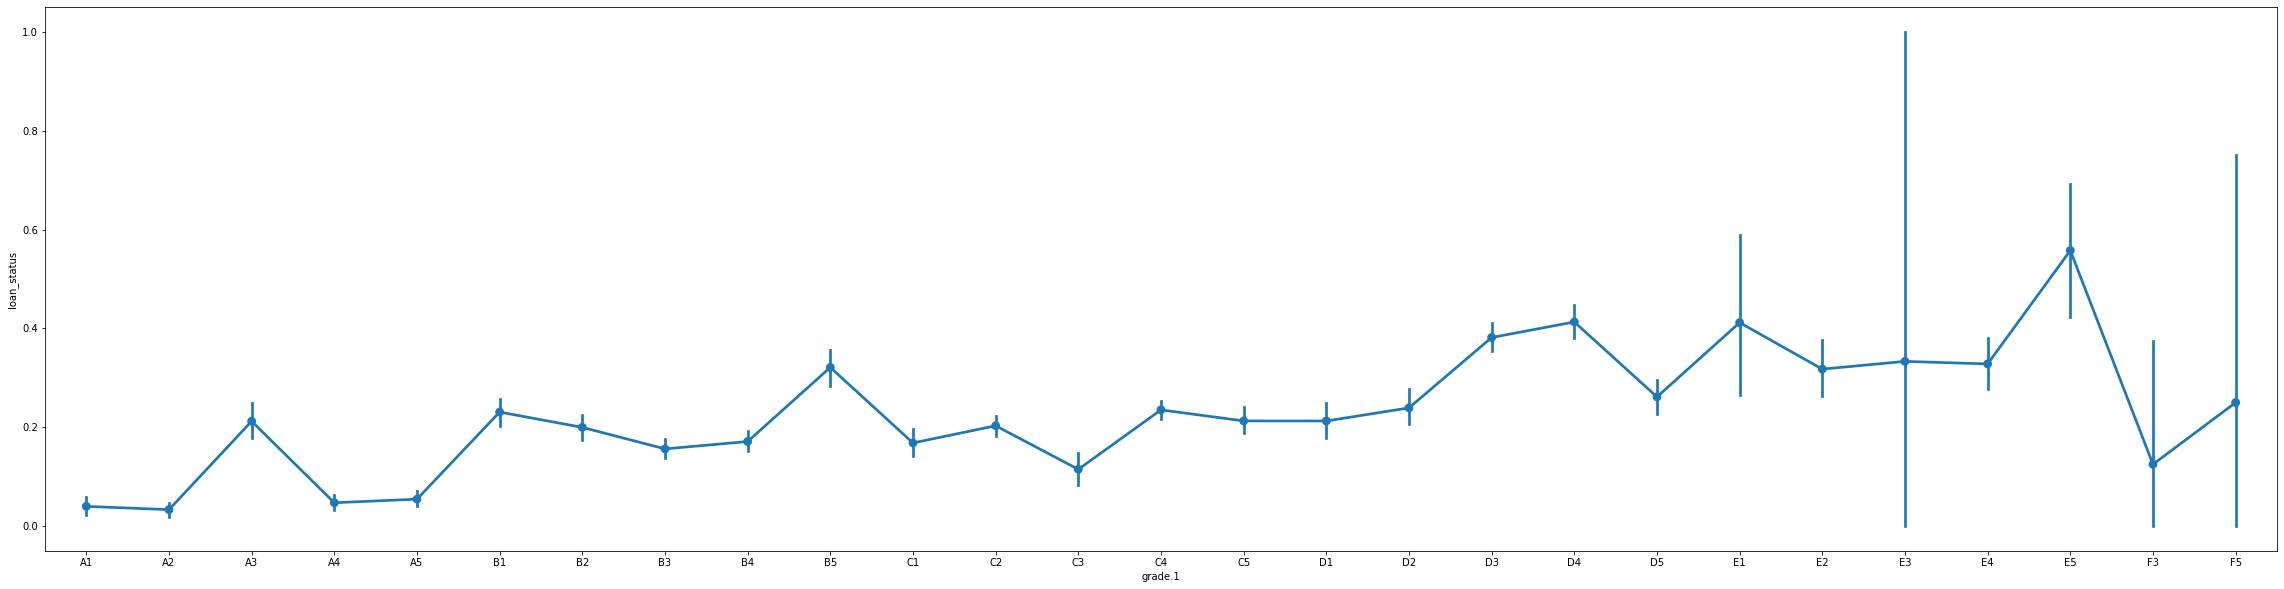

In [35]:
plt.figure(figsize=(40, 10))
df_train_grade = df_train.sort_values('grade')
sns.pointplot(x = "grade.1", y = TARGET, data = df_train_grade)

<AxesSubplot:xlabel='grade_bin', ylabel='loan_status'>

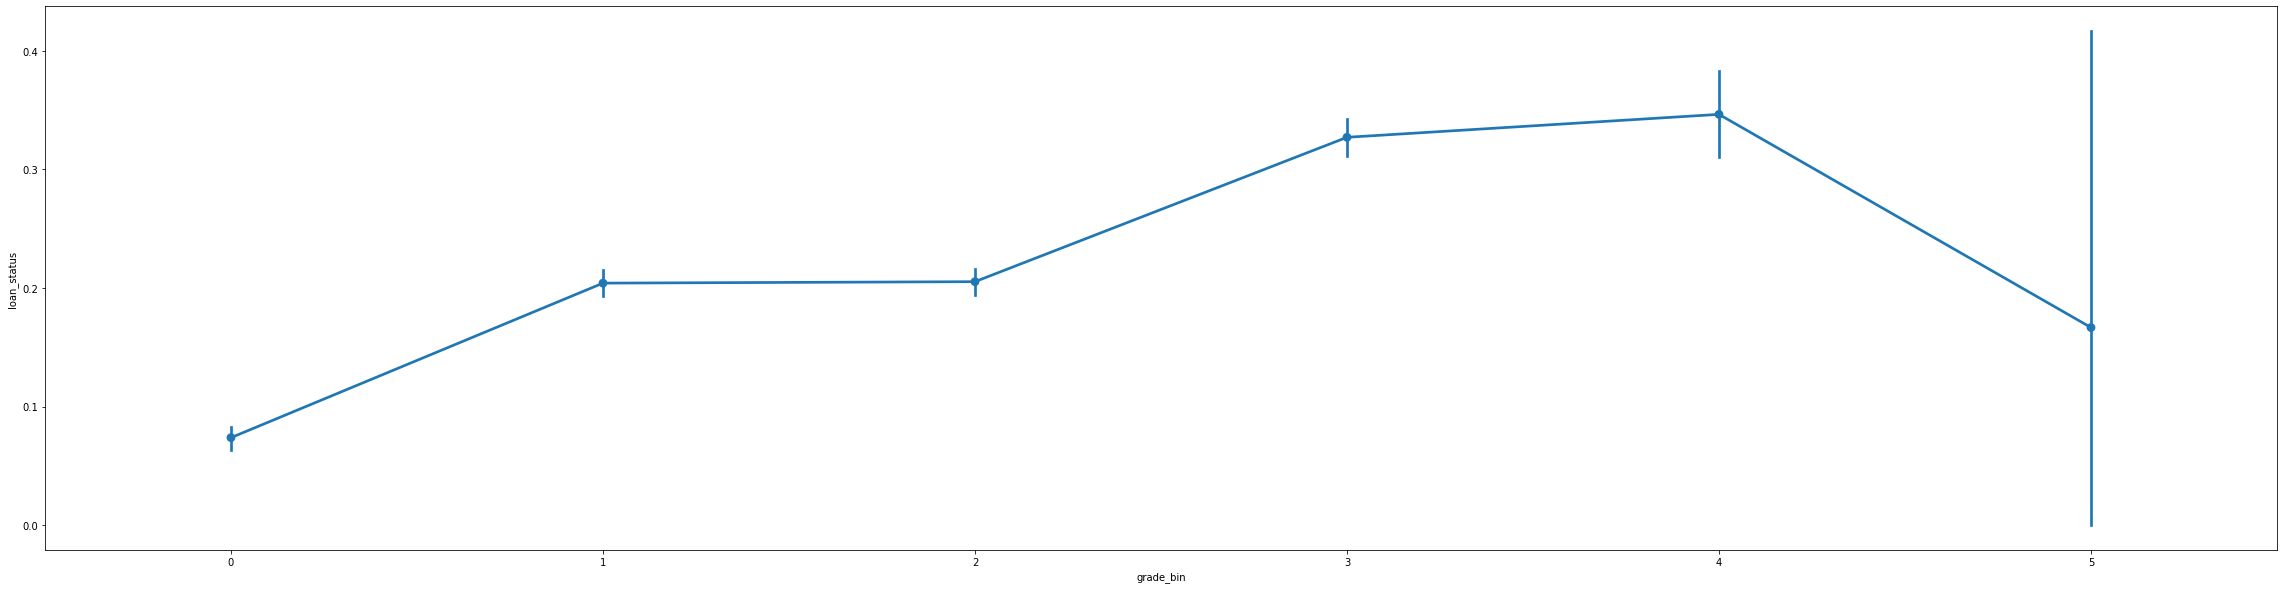

In [22]:
plt.figure(figsize=(40, 10))
df_train_grade = df_train
df_train_grade[TARGET] = df_train_grade[TARGET].astype(object)
df_train_grade = df_train_grade.sort_values('grade_bin')
sns.pointplot(x = "grade_bin", y = TARGET, data = df_train_grade)

## purpose

In [25]:
df['purpose'].unique()

array(['debt_consolidation', 'house', 'medical', 'credit_card', 'other',
       'small_business', 'major_purchase', 'home_improvement', 'car'],
      dtype=object)

<AxesSubplot:xlabel='purpose', ylabel='count'>

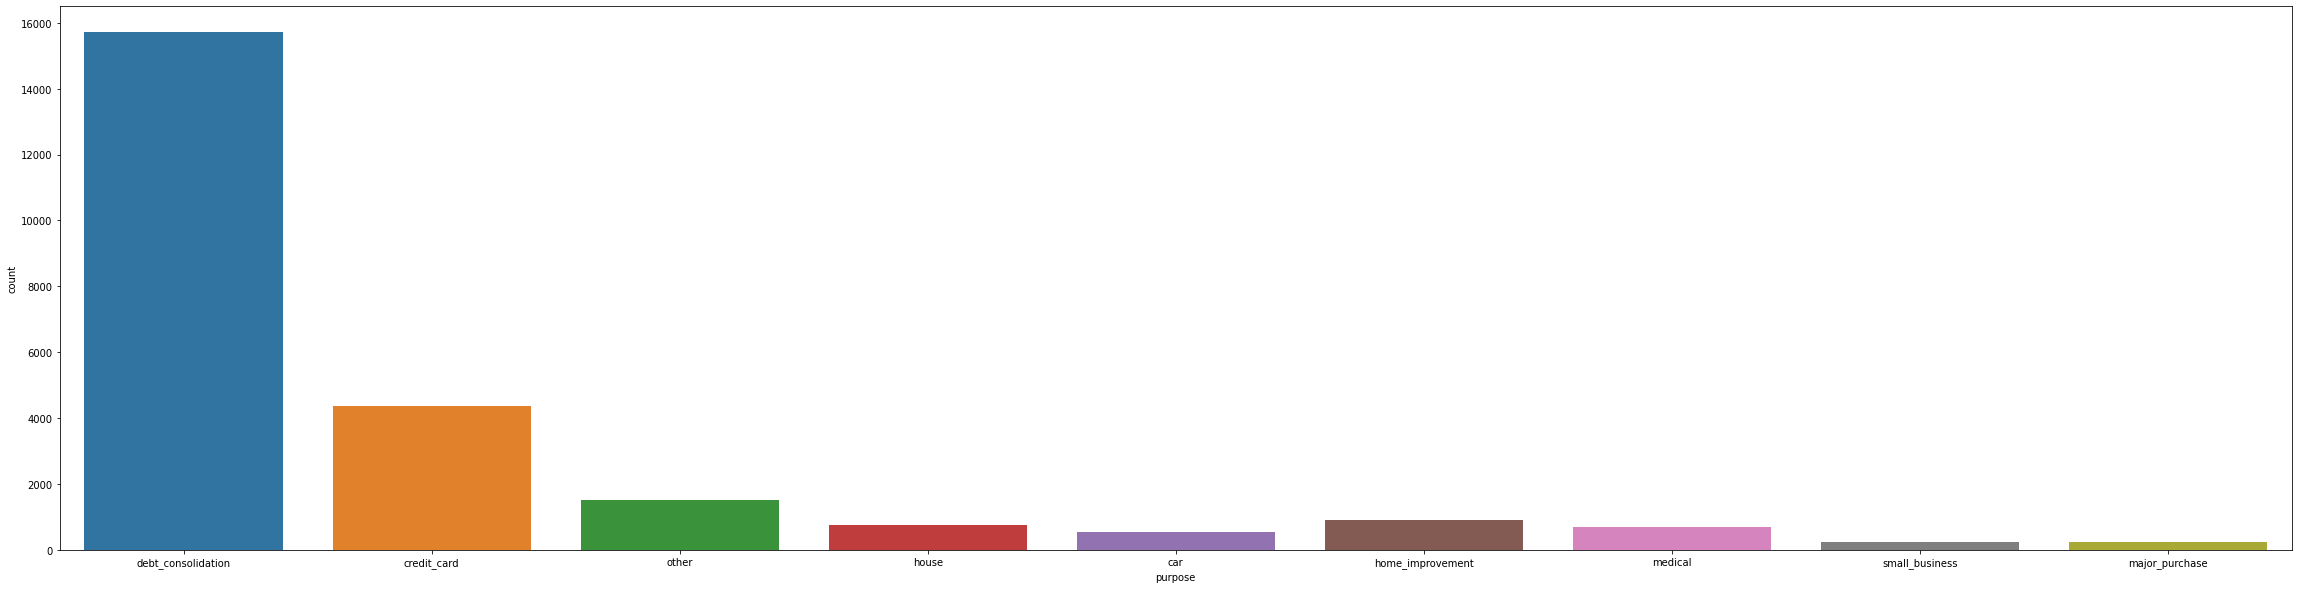

In [46]:
plt.figure(figsize=(40, 10))
sns.countplot(x = "purpose", data = df)

<AxesSubplot:xlabel='purpose', ylabel='loan_status'>

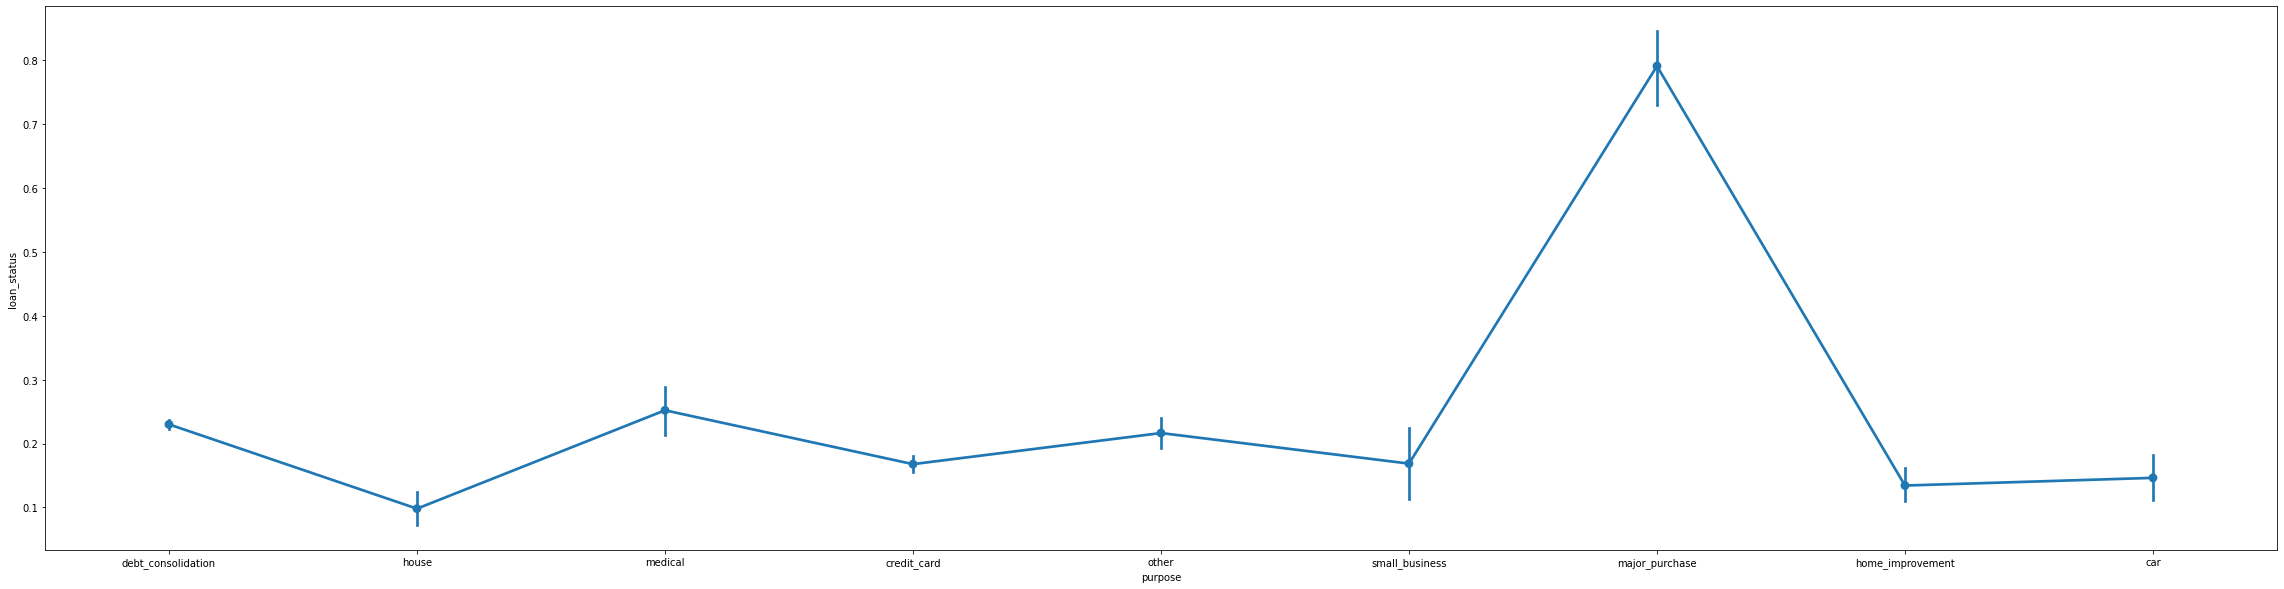

In [47]:
plt.figure(figsize=(40, 10))
df_train_purpose = df_train
df_train_purpose[TARGET] = df_train_purpose[TARGET].astype(object)
sns.pointplot(x = "purpose", y = TARGET, data = df_train_purpose)

<AxesSubplot:xlabel='purpose', ylabel='count'>

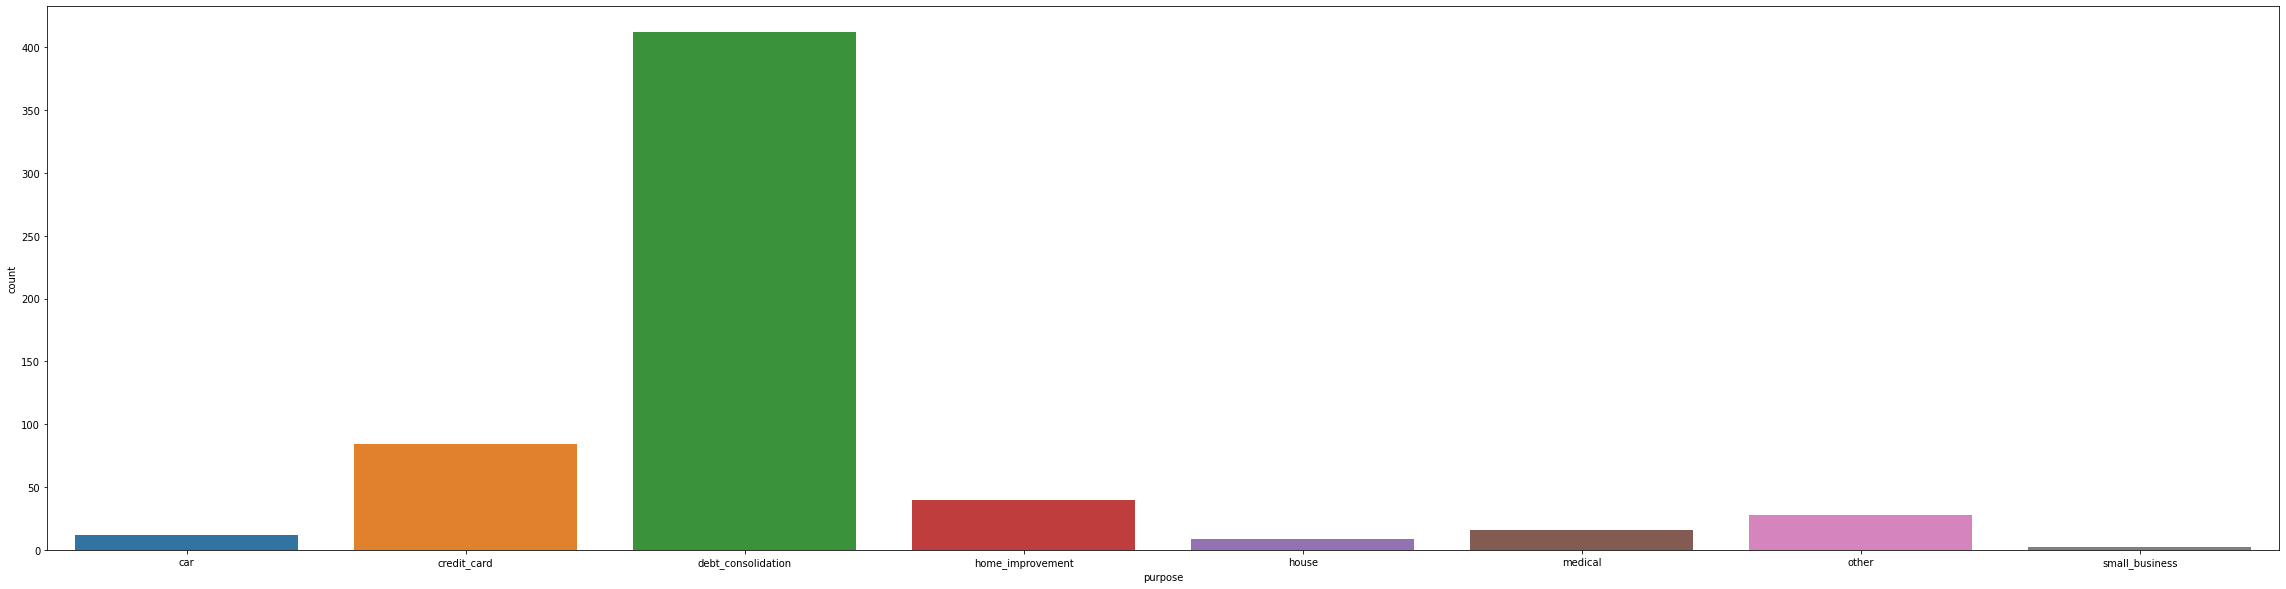

In [59]:
plt.figure(figsize=(40, 10))
df_purpose = df.sort_values('purpose')
sns.countplot(x = "purpose", data = df_purpose[df_purpose["grade.1"] == "A1"])

<AxesSubplot:xlabel='purpose', ylabel='count'>

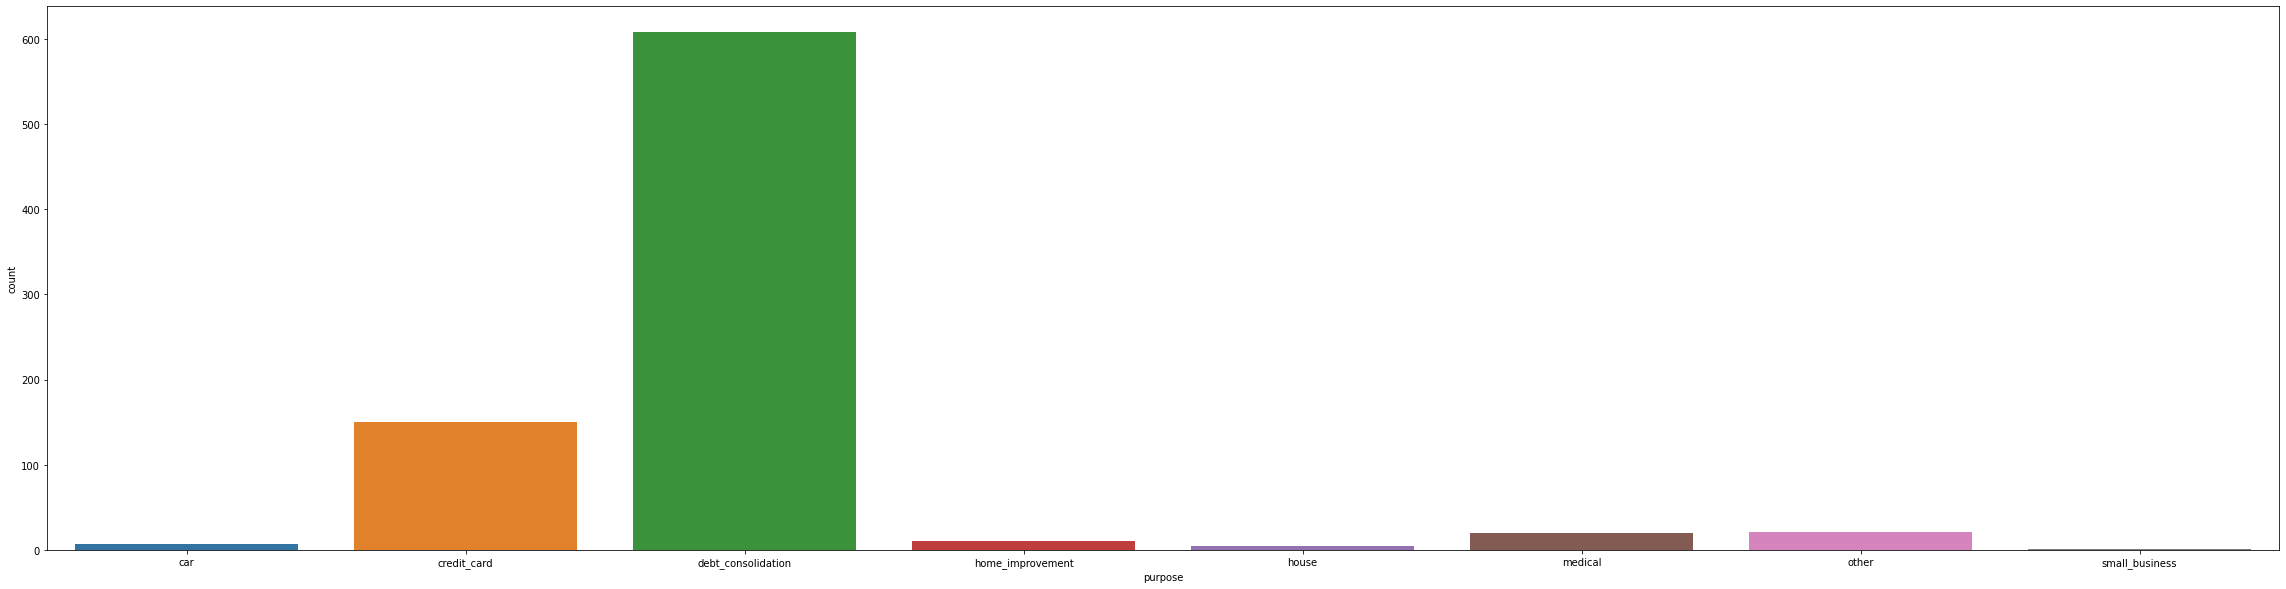

In [61]:
plt.figure(figsize=(40, 10))
df_purpose = df.sort_values('purpose')
sns.countplot(x = "purpose", data = df_purpose[df_purpose["grade.1"] == "A2"])

<AxesSubplot:xlabel='purpose', ylabel='count'>

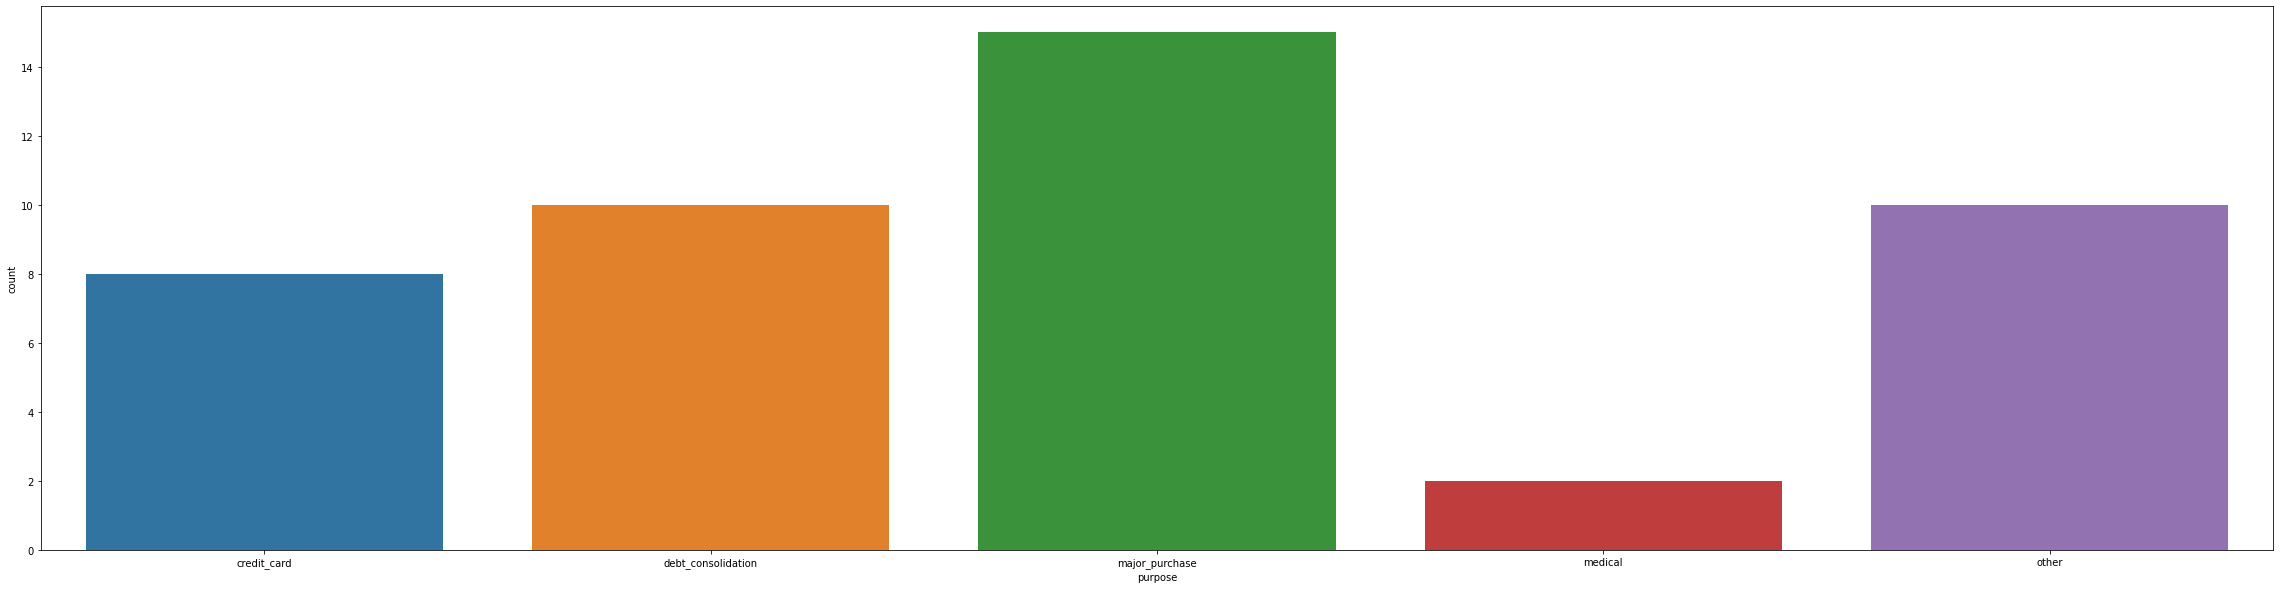

In [63]:
plt.figure(figsize=(40, 10))
df_purpose = df.sort_values('purpose')
sns.countplot(x = "purpose", data = df_purpose[df_purpose["grade.1"] == "E1"])

major_purchaseが高い＝＞車・船・飛行機などの購入  
これらはtermが大きいがち
正し割合がとても低い

In [20]:
len(df[df.purpose == 'major_purchase'])/len(df)

0.0096

## application_type

In [29]:
df['application_type'].unique()

array(['Individual', 'Joint App'], dtype=object)

<AxesSubplot:xlabel='application_type', ylabel='loan_status'>

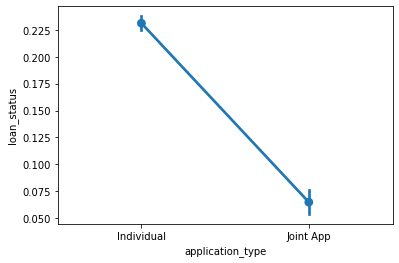

In [32]:

df_train_type = df_train
df_train_type[TARGET] = df_train_type[TARGET].astype(object)
sns.pointplot(x = "application_type",y = TARGET, data = df_train_type)

## term

他と組み合わせてみる

<AxesSubplot:xlabel='term', ylabel='loan_status'>

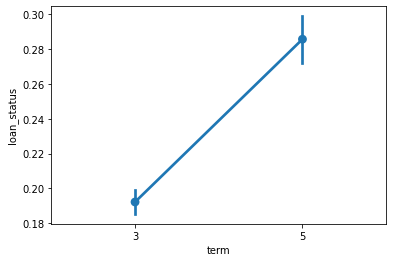

In [12]:
sns.pointplot(x = "term",y = TARGET, data = df_train)

# 欠損値処理

job education contact poutcomeのunknownをそれ以外で埋める。
モデルは安直にrondomforest

In [5]:
df.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,grade.1,credit_score,application_type,loan_status,is_train,amnt_per_year,grade_ordinal
0,0,1742.228656,5,7.992879,4,8,debt_consolidation,A4,677.196371,Individual,NaN,False,348.445731,4
1,1,630.300979,3,13.604302,18,6,debt_consolidation,D3,655.143270,Individual,NaN,False,210.100326,18
2,2,1606.895116,5,24.674460,15,10,credit_card,C5,680.532978,Individual,NaN,False,321.379023,15
3,3,1120.716185,3,13.407068,11,1,credit_card,C1,659.544561,Individual,NaN,False,373.572062,11
4,4,688.615551,3,18.118501,12,10,other,C2,654.822203,Individual,NaN,False,229.538517,12


Time to plot is 82.23 seconds.


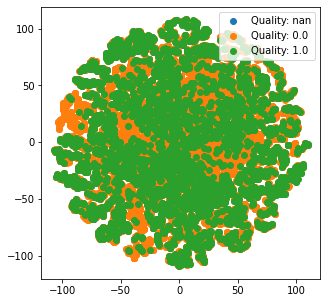

In [13]:
'''import time

X = df[["grade_ordinal", "credit_score", "interest_rate"]]
y = df[TARGET]
y_items = y.unique()
n_components = 2
perplexity=10 

start_time = time.time()
fig, ax = plt.subplots(figsize=(5,5))
tsne = TSNE(n_components=n_components, init='random', random_state=0, perplexity=perplexity)
Y = tsne.fit_transform(X)
for each_quality in y_items:
    c_plot_bool = y == each_quality # True/Falseのarrayを返す
    ax.scatter(Y[c_plot_bool, 0], Y[c_plot_bool, 1], label="Quality: {}".format(each_quality))
end_time = time.time()
ax.legend()
print("Time to plot is {:.2f} seconds.".format(end_time - start_time))'''

/Users/kohei/.pyenv/versions/3.8.7/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


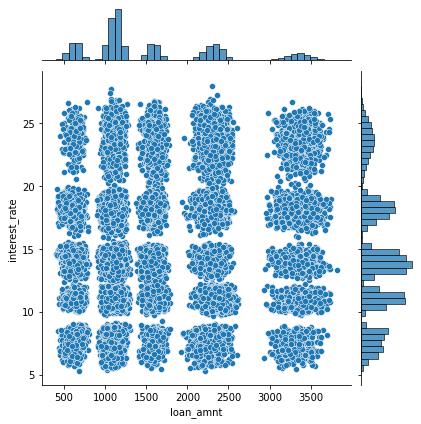

In [7]:
sns.jointplot("loan_amnt","interest_rate", data = df)